In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Dataset Description 


RowNumber—  rown numbers and has no effect on the output.

CustomerId—contains random values and has no effect on customer leaving the bank.

Surname—the surname of a customer has no impact on their decision to leave the bank.

CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer’s location can affect their decision to leave the bank.

Gender—gender can play a role in a customer leaving the bank.

Age—this can also be relevant, since older customers are less likely to leave their bank than younger ones.

Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance—also a very good factor of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts—refers to the number of products that a customer has purchased through the bank.

HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited—whether or not the customer left the bank.

In [4]:
df.shape

(10000, 14)

In [5]:
# there is no null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Exploratary data Analysis

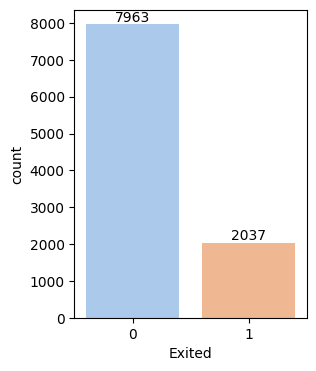

In [8]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Exited',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

Our data is little imbalanced as approximataly 75% of the customer did not exit bank and about 25 % exited ones.

<AxesSubplot: xlabel='NumOfProducts', ylabel='count'>

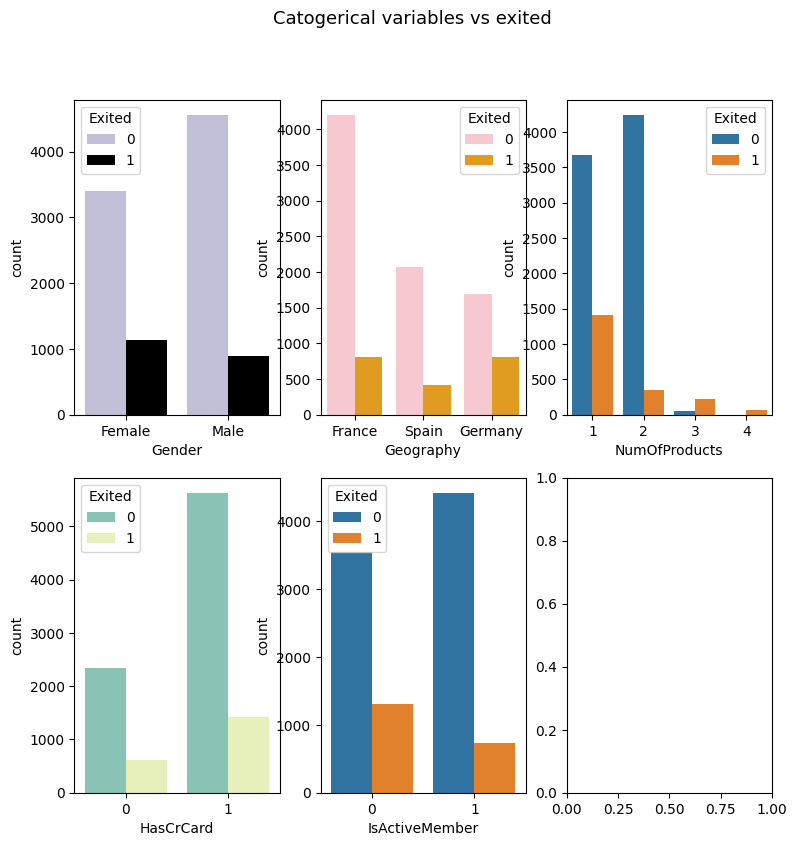

In [9]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(9,9))
fig.suptitle('Catogerical variables vs exited',size=13)

sns.countplot(ax=axes[0,0],data=df,x=df['Gender'],hue='Exited',palette=["#bcbddc", "Black"])
sns.countplot(ax=axes[0,1],data=df,x=df['Geography'],hue='Exited',palette=["Pink","Orange"])

sns.countplot(ax=axes[1,0],data=df,x=df['HasCrCard'],hue='Exited',palette= ["#7fcdbb","#edf8b1"])
sns.countplot(ax=axes[1,1],data=df,x=df['IsActiveMember'],hue='Exited')
sns.countplot(ax=axes[0,2],x='NumOfProducts',hue='Exited',data=df)

Gender: From the above countplots we can observe that the ratio of the females who exited id more as compared to male

Country: There is no much difference between the people of different countries who exited but most data is from France.
Bur the major concerned is with clients in Germany as half of the clients left the bank so the bank should take the factors affecting serious.

Number of Products : We can see the people with one product exited most.And who have 2 products stayes so the bank can motivate people to buy atleast 2 products.

Has Credit card:Surprisingly,customers who have credit card exited the bank 

Is Active memmber: Unsurprsingly, the people who were not active member exited the bank.Maybe bank need to implement the program that can make the customers active and exit ratio can be decreased.

<AxesSubplot: xlabel='Exited', ylabel='EstimatedSalary'>

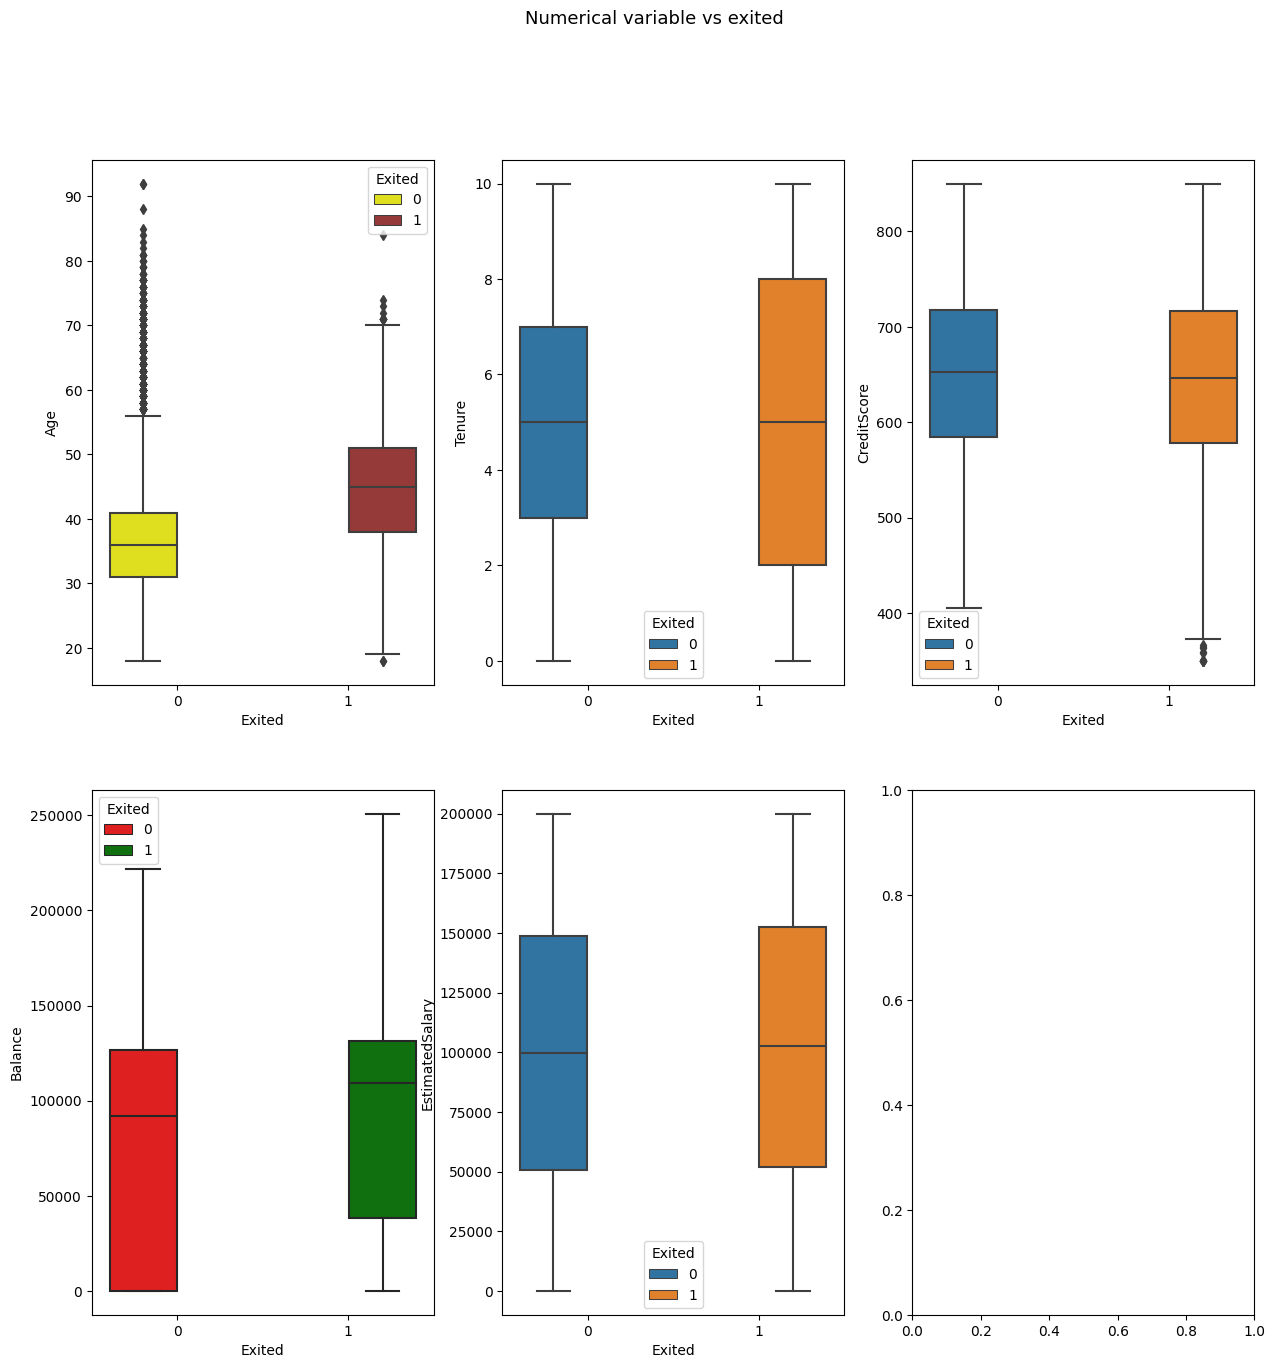

In [10]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,15))
fig.suptitle('Numerical variable vs exited',size=13)
sns.boxplot(ax=axes[0,0],y='Age',x='Exited',hue='Exited',data=df,palette=['Yellow','Brown'])
sns.boxplot(ax=axes[0,1],y='Tenure',x='Exited',hue='Exited',data=df)
sns.boxplot(ax=axes[0,2],y='CreditScore',x='Exited',hue='Exited',data=df)
sns.boxplot(ax=axes[1,0],y='Balance',x='Exited',hue='Exited',data=df,palette=['Red','Green'])
sns.boxplot(ax=axes[1,1],y='EstimatedSalary',x='Exited',hue='Exited',data=df)

Age: More older people left the bank as compared to adult.But there are some outliers as well in the data

Tenure: Either the customers who spent very little time or who spent a lot of time with bank exited the bank. people with average tenure did not exit.

CreditScore:  credit score has no much effect on the customers who exited the bank.

Balance:Customers with good bank balance exited the bank that is not good for bank.

Salary: Salary does not have much impact on the customers who left the bank

### Data Preprocessing

In [11]:
# Dropping the first three columns as those are personal to customers will not needed for modelling purposes.
df=df.iloc[:,3:14]

In [12]:
df.corr()

C:\Users\Priyanka Sharma\AppData\Local\Temp\ipykernel_20392\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


As we can see most of the features have about zero correlation with the target variable which is whether the customer left the bank or not except th age feature has little positive correlation with the target.

In [13]:
num_cols=['CreditScore','Age','Tenure','Balance','EstimatedSalary']


<AxesSubplot: >

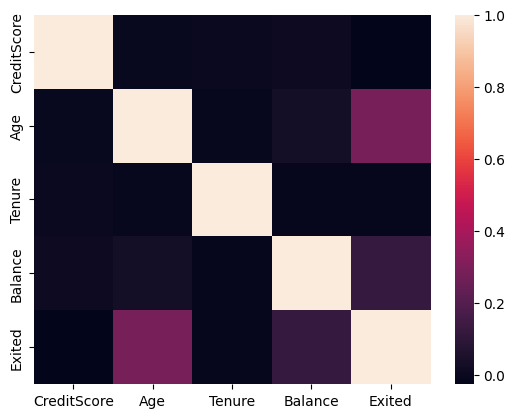

In [14]:
df1=df.drop(['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'],axis=1)
type(df)
sns.heatmap(df1.corr())

In [15]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [16]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

#### 	One- hot Encoding: 
The strategy is to convert each value into a new column and assign a 1 or 0 value to the column.

In [17]:

x=pd.get_dummies(x,columns=['Geography','Gender'])

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

### Standardization

In [19]:
from sklearn.preprocessing import MinMaxScaler

# min max scaling of the numerical columns : I scales all the data features in the range 0 to 1.

num_cols=['Balance','EstimatedSalary']
scaler=MinMaxScaler()
x_train[num_cols]=scaler.fit_transform(x_train[num_cols])

x_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,650.463867,38.840000,4.974400,0.317388,1.535333,0.707067,0.516933,0.500836,0.507733,0.244000,0.248267,0.458267,0.541733
std,97.169199,10.481704,2.889462,0.262816,0.577809,0.455138,0.499746,0.287521,0.499974,0.429521,0.432036,0.498289,0.498289
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,583.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.257200,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,0.404043,1.000000,1.000000,1.000000,0.500329,1.000000,0.000000,0.000000,0.000000,1.000000
75%,719.000000,44.000000,7.000000,0.534055,2.000000,1.000000,1.000000,0.748015,1.000000,0.000000,0.000000,1.000000,1.000000
max,850.000000,85.000000,10.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# min max scaling the test data 

scaler1=MinMaxScaler()
x_test[num_cols]=scaler1.fit_transform(x_test[num_cols])

x_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9394,597,35,8,0.522527,1,1,1,0.964388,0,1,0,1,0
898,523,40,2,0.410395,1,1,0,0.643444,1,0,0,1,0
2398,706,42,8,0.380182,1,1,1,0.378437,0,0,1,1,0
5906,788,32,4,0.446714,1,0,0,0.446659,1,0,0,0,1
2343,706,38,5,0.649805,2,1,1,0.678265,0,1,0,0,1


### Data Modelling

#### 1. Support Vector machine with RBF kernel

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

C is hyper or regularization parameter of svm which controls the error the strength of regularization is inversely propotion.

If c is small the penalty for misclassified point is low and decision boundary with large margin is chosen.

If c is large then margin will be small as svm tries to minimize the number of  misclassified data points.

Gamma -High value ,similarity radius decreases and better classification
Low value-Low value indicates large similarity radius which results into more points grouped together.


In [22]:
# chossing the best hyperparameter with cross validation of 3


param_grid={'C':[0.5,100,130],
           'gamma':[0.1,0.01,0.01,0.001],'kernel':['rbf']}
svm_grid=GridSearchCV(SVC(),param_grid,cv=3,verbose=0)
svm_grid.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.5, 100, 130],
                         'gamma': [0.1, 0.01, 0.01, 0.001], 'kernel': ['rbf']})

In [23]:
svm_grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

#### 2. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression


In [25]:
# c - smaller values specify stonger regularization

param_grid={'C':[0.1,0.5,1,10,50,100],'fit_intercept':[True],'tol':[0.001,0.0001]}
lr_grid=GridSearchCV(LogisticRegression(),param_grid,cv=5,verbose=0)
lr_grid.fit(x_train,y_train)
lr_grid.best_params_

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

{'C': 50, 'fit_intercept': True, 'tol': 0.001}

#### 3. Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier


In [27]:
param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(3,10)}
dt_grid=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=3)
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9])})

#### 4. Random forest without oversampling

In [28]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[100,200],'max_depth':np.arange(3,10)}

rf_grid=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=3)
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 200]})

#### 5. Random Forest with oversampling

In [29]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

smote_pipeline=make_pipeline(SMOTE(random_state=42),RandomForestClassifier(n_estimators=100,random_state=13))

In [30]:
param_grid={'n_estimators':[100,200],'max_depth':np.arange(3,10)}

new_params = {'randomforestclassifier__' + key: param_grid[key] for key in param_grid}
rf_gridSmote=GridSearchCV(smote_pipeline,new_params,cv=3)
rf_gridSmote.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'randomforestclassifier__n_estimators': [100, 200]})

#### 6. Extreme Gradient Boosting Classifier

In [31]:
from xgboost import XGBClassifier

In [32]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [33]:
xgb_grid=GridSearchCV(XGBClassifier(
    objective= 'binary:logistic',
    random_state=42
),param_grid=parameters,scoring = 'roc_auc',
    cv = 5,
    verbose=True
)


In [34]:
xgb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

### Comparing all models

In [35]:
print('Classification Report of Support vector Classifier \n')
print(classification_report(y_train,svm_grid.predict(x_train)))

Classification Report of Support vector Classifier 

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      5972
           1       0.83      0.29      0.43      1528

    accuracy                           0.84      7500
   macro avg       0.84      0.64      0.67      7500
weighted avg       0.84      0.84      0.81      7500



In [36]:
print('Classification Report of Logistic Regression\n')
print(classification_report(y_train,lr_grid.predict(x_train)))

Classification Report of Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5972
           1       0.62      0.22      0.32      1528

    accuracy                           0.81      7500
   macro avg       0.72      0.59      0.61      7500
weighted avg       0.78      0.81      0.77      7500



In [37]:
print('Classification Report of Decision tree Classifier \n')
print(classification_report(y_train,dt_grid.predict(x_train)))

Classification Report of Decision tree Classifier 

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      5972
           1       0.80      0.45      0.58      1528

    accuracy                           0.87      7500
   macro avg       0.84      0.71      0.75      7500
weighted avg       0.86      0.87      0.85      7500



In [38]:
print('Classification Report of Random Forest Classifier without oversampling \n')
print(classification_report(y_train,rf_grid.predict(x_train)))

Classification Report of Random Forest Classifier without oversampling 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      5972
           1       0.92      0.45      0.60      1528

    accuracy                           0.88      7500
   macro avg       0.90      0.72      0.77      7500
weighted avg       0.88      0.88      0.86      7500



In [39]:
print('Classification Report of Random Forest Classifier with Smote oversampling \n')
print(classification_report(y_train,rf_gridSmote.predict(x_train)))

Classification Report of Random Forest Classifier with Smote oversampling 

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5972
           1       0.72      0.67      0.69      1528

    accuracy                           0.88      7500
   macro avg       0.82      0.80      0.81      7500
weighted avg       0.88      0.88      0.88      7500



In [40]:
print('Classification Report of Extreme boost gradient classifier \n ')
print(classification_report(y_train,xgb_grid.predict(x_train)))

Classification Report of Extreme boost gradient classifier 
 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5972
           1       0.83      0.48      0.61      1528

    accuracy                           0.87      7500
   macro avg       0.86      0.73      0.77      7500
weighted avg       0.87      0.87      0.86      7500



In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def auc_scores(Yactual, meth,meth1):
    auc_score = roc_auc_score(Yactual, meth); 
    fpr, tpr, _ = roc_curve(Yactual, meth1); 
    return (auc_score, fpr, tpr)

In [42]:
y = y_train
x = x_train

auc_lg, fpr_lg, tpr_lg = auc_scores(y, lr_grid.predict(x),lr_grid.predict_proba(x)[:,1])


#auc_svm, fpr_svm, tpr_svm = auc_scores(y, svm_grid.predict(x),svm_grid.predict_proba(x)[:,1])

auc_dt,fpr_dt,tpr_dt=auc_scores(y,dt_grid.predict(x),dt_grid.predict_proba(x)[:,1])
auc_rf, fpr_rf, tpr_rf = auc_scores(y, rf_grid.predict(x),rf_grid.predict_proba(x)[:,1])

auc_RFsmote, fpr_RFsmote, tpr_RFsmote = auc_scores(y, rf_gridSmote.predict(x),rf_gridSmote.predict_proba(x)[:,1])

auc_XGB, fpr_XGB, tpr_XGB = auc_scores(y, xgb_grid.predict(x),xgb_grid.predict_proba(x)[:,1])

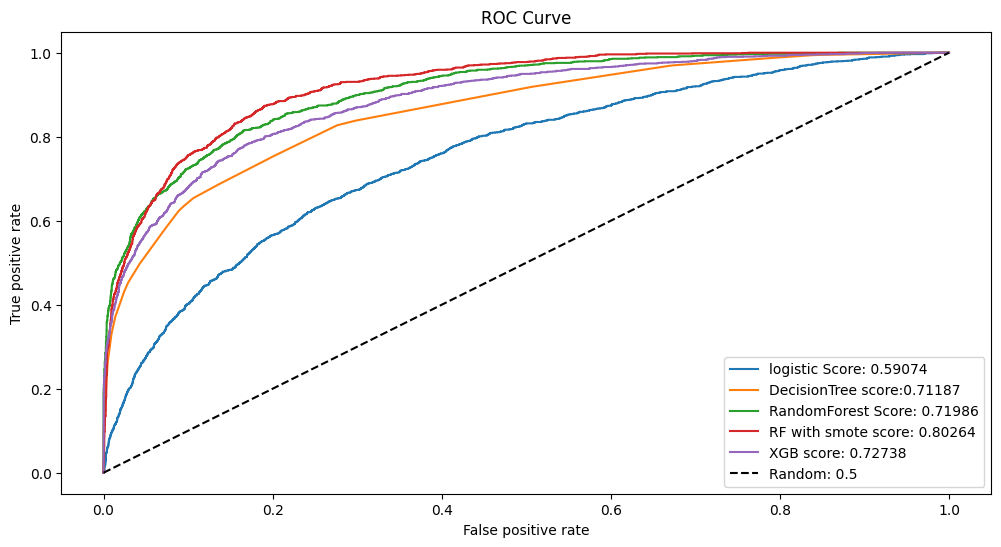

In [43]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_lg, tpr_lg, label = 'logistic Score: ' + str(round(auc_lg, 5)))
#plt.plot(fpr_svm, tpr_svm, label = 'SVM score: ' + str(round(auc_svm, 5)))
plt.plot(fpr_dt,tpr_dt,label='DecisionTree score:' + str(round(auc_dt,5)))
plt.plot(fpr_rf, tpr_rf, label = 'RandomForest Score: ' + str(round(auc_rf, 5)))
plt.plot(fpr_RFsmote, tpr_RFsmote, label = 'RF with smote score: ' + str(round(auc_RFsmote, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()

### Optimising for recall and precison on 1's
The major goal of this model is to predict the customers who can be churn means recall of 1's should be high which is ability to identify all the customers who exited.
While maintaining the precsion which is all the customers which were predicted as churn actually exited.

The model which gave balance of both recall and precision is Random forest classifier with smote oversampling with recall of 0.79 and precison of 0.61

### Testing the best model XGB classifier

In [44]:
print(classification_report(y_test,  rf_gridSmote.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1991
           1       0.60      0.63      0.61       509

    accuracy                           0.84      2500
   macro avg       0.75      0.76      0.76      2500
weighted avg       0.84      0.84      0.84      2500



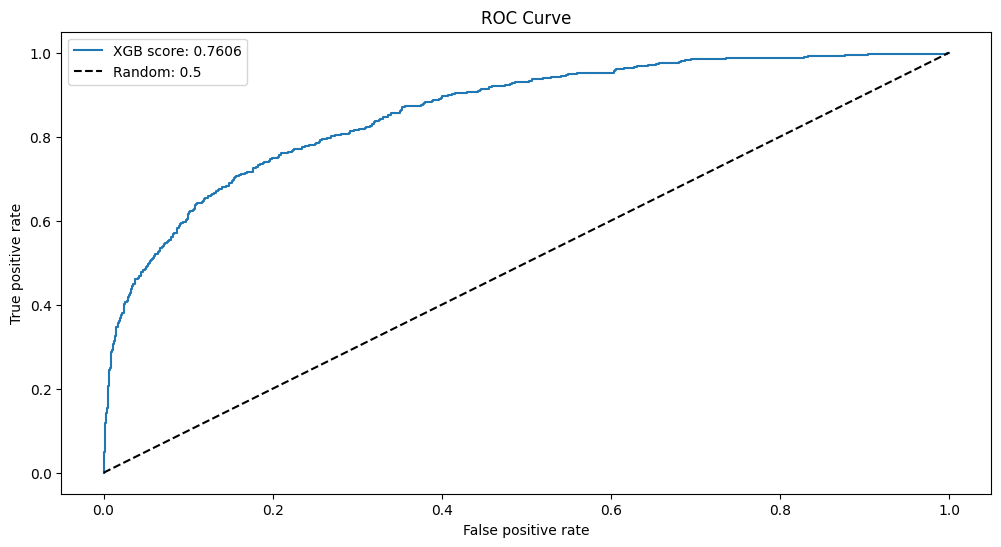

In [45]:
auc_XGBtest, fpr_XGBtest, tpr_XGBtest = auc_scores(y_test, rf_gridSmote.predict(x_test),
                                                       rf_gridSmote.predict_proba(x_test)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_XGBtest, tpr_XGBtest, label = 'XGB score: ' + str(round(auc_XGBtest, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [46]:
confusion_matrix(y_test,xgb_grid.predict(x_test))

array([[1908,   83],
       [ 254,  255]], dtype=int64)